In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [3]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# Is there a trend in category of offence over time? (time series analysis)

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    'date': '2023-12'
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [4]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.800385', 'street': {'id': 1554273, 'name': 'On or near Kingswell Street'}, 'longitude': '-1.091286'}",None,115403022,2023-12
1,anti-social-behaviour,Force,"{'latitude': '50.799526', 'street': {'id': 1554494, 'name': 'On or near Lower Church Path'}, 'longitude': '-1.088436'}",None,115402750,2023-12
2,anti-social-behaviour,Force,"{'latitude': '50.800470', 'street': {'id': 1553879, 'name': 'On or near Prince George Street'}, 'longitude': '-1.102324'}",None,115403050,2023-12
3,anti-social-behaviour,Force,"{'latitude': '50.803931', 'street': {'id': 1554940, 'name': 'On or near Foster Road'}, 'longitude': '-1.081283'}",None,115403843,2023-12
4,anti-social-behaviour,Force,"{'latitude': '50.804537', 'street': {'id': 1555775, 'name': 'On or near Bowler Avenue'}, 'longitude': '-1.064738'}",None,115403953,2023-12


In [5]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 82
id: 0
month: 0


In [8]:
df['id'].duplicated().sum()

0

In [7]:
df['month'].value_counts()

2023-12    916
Name: month, dtype: int64

In [9]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [10]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
62,anti-social-behaviour,Force,"{'latitude': '50.804537', 'street': {'id': 1555775, 'name': 'On or near Bowler Avenue'}, 'longitude': '-1.064738'}",None,115403951,2023-12-01
271,other-theft,Force,"{'latitude': '50.792795', 'street': {'id': 1554333, 'name': 'On or near Eldon Street'}, 'longitude': '-1.091291'}",Unable to prosecute suspect,115401056,2023-12-01
891,violent-crime,Force,"{'latitude': '50.805608', 'street': {'id': 1554607, 'name': 'On or near Parking Area'}, 'longitude': '-1.086487'}",Unable to prosecute suspect,115404027,2023-12-01
349,public-order,Force,"{'latitude': '50.800552', 'street': {'id': 1555143, 'name': 'On or near Clifton Street'}, 'longitude': '-1.078227'}",Unable to prosecute suspect,115403211,2023-12-01
606,violent-crime,Force,"{'latitude': '50.798881', 'street': {'id': 1554162, 'name': 'On or near Parking Area'}, 'longitude': '-1.092181'}",Investigation complete; no suspect identified,115402555,2023-12-01
171,criminal-damage-arson,Force,"{'latitude': '50.798330', 'street': {'id': 1554460, 'name': 'On or near Durham Street'}, 'longitude': '-1.087182'}",Investigation complete; no suspect identified,115402593,2023-12-01
676,violent-crime,Force,"{'latitude': '50.813957', 'street': {'id': 1554739, 'name': 'On or near Mills Road'}, 'longitude': '-1.084663'}",Unable to prosecute suspect,115404729,2023-12-01
681,violent-crime,Force,"{'latitude': '50.811373', 'street': {'id': 1555517, 'name': 'On or near Queen's Road'}, 'longitude': '-1.071698'}",Under investigation,115404575,2023-12-01
735,violent-crime,Force,"{'latitude': '50.799193', 'street': {'id': 1554345, 'name': 'On or near Surrey Street'}, 'longitude': '-1.090585'}",Unable to prosecute suspect,115402795,2023-12-01
845,violent-crime,Force,"{'latitude': '50.816934', 'street': {'id': 1555407, 'name': 'On or near Wykeham Avenue'}, 'longitude': '-1.073277'}",Unable to prosecute suspect,115404877,2023-12-01


In [11]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
821,violent-crime,Force,Parking Area,Awaiting court outcome,115404050,2023-12-01
609,violent-crime,Force,Nightclub,Investigation complete; no suspect identified,115402836,2023-12-01
725,violent-crime,Force,Upper Arundel Street,Investigation complete; no suspect identified,115402723,2023-12-01
412,shoplifting,Force,Buckingham Street,Under investigation,115403379,2023-12-01
241,other-theft,Force,Supermarket,Investigation complete; no suspect identified,115404782,2023-12-01
874,violent-crime,Force,Liverpool Road,Unable to prosecute suspect,115403181,2023-12-01
888,violent-crime,Force,Cornwallis Crescent,Unable to prosecute suspect,115403783,2023-12-01
517,violent-crime,Force,All Saints' Street,Unable to prosecute suspect,115403939,2023-12-01
695,violent-crime,Force,All Saints' Street,Unable to prosecute suspect,115403943,2023-12-01
156,criminal-damage-arson,Force,Parking Area,Under investigation,115403511,2023-12-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'public-order'),
  Text(2, 0, 'anti-social-behaviour'),
  Text(3, 0, 'criminal-damage-arson'),
  Text(4, 0, 'shoplifting')])

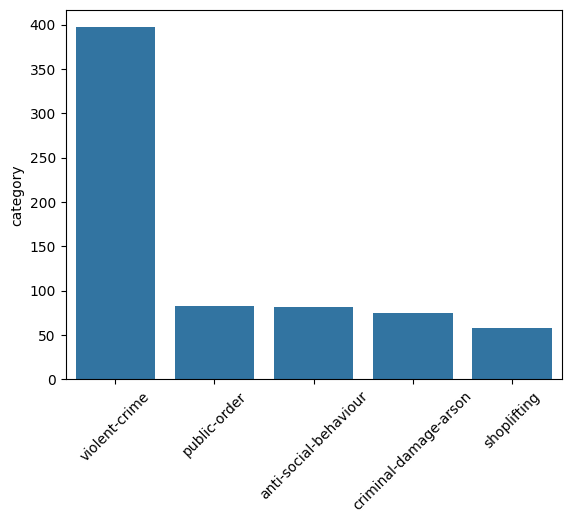

In [13]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Further/higher Educational Building'),
  Text(3, 0, ' Guildhall Walk'),
  Text(4, 0, ' Victory Road')])

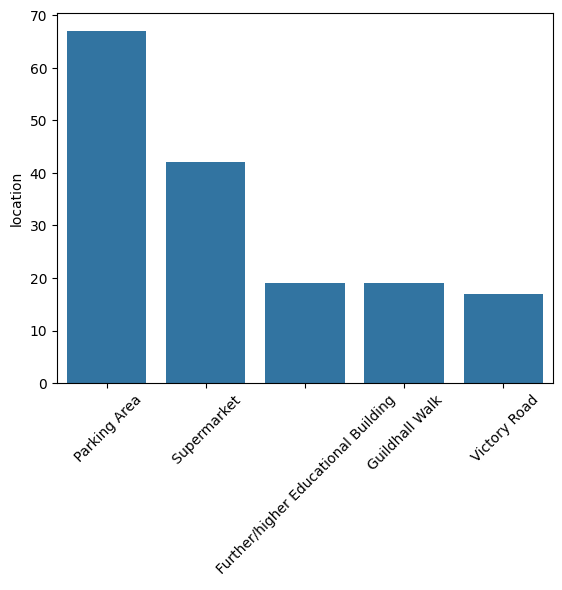

In [16]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

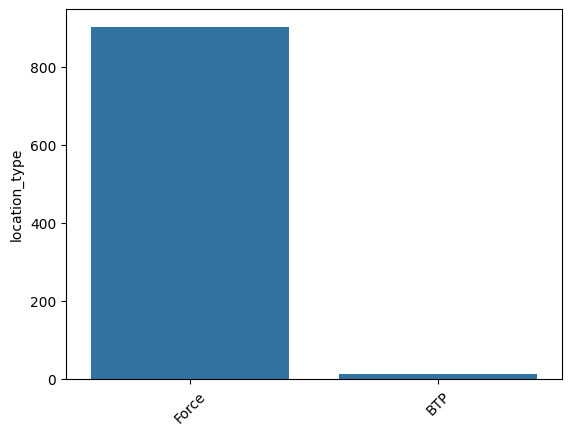

In [15]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Investigation complete; no suspect identified'),
  Text(1, 0, 'Unable to prosecute suspect'),
  Text(2, 0, 'Under investigation'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Local resolution')])

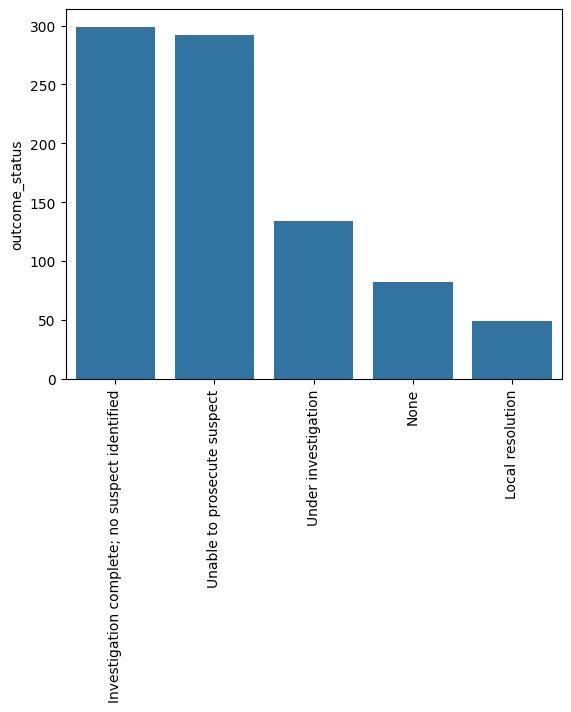

In [17]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [18]:
df.shape

(916, 6)

In [19]:
df.to_csv("Crimes_Port_2023_12", index=False)